# Data Preparation

In [69]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
import os
import pandas as pd

#Import the data using the file path

from google.colab import drive
drive.mount('/content/drive')

data_path = ['drive', 'My Drive', 'CapstoneProject']

filepath = os.sep.join(data_path + ['dataset.csv'])
data = pd.read_csv(filepath, encoding='latin-1')
print('Data shape: {}'.format(data.shape))

print(f"Pandas version = {pd.__version__}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shape: (2459, 3)
Pandas version = 1.5.3


In [71]:
data.head()

,OpticalDiagnosisCode,ServiceItemName,Void
0,HYPERMETROPIA,FUCITHALMIC 10mg/g,N
1,HYPOTONY,NEVANAC (Nepafenac 0.1%),Y
2,ACCOMODATION AND CONVERGENCE ABNORMALITIES,PATADAY (Olopatadine HCL 0.2%),N
3,DIABETIC MACULAR ISCHAEMIA-DIABETIC MACULOPATHY,TIMOLOL-POS 0.5%,N
4,DISCIFORM KERATITIS-HERPES SIMPLEX KERATITIS,CUSIVIRAL,Y


# Change fields from String to Numbers


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
#change the ServiceItemName from string to numbers using LabelEncoder
ServiceItemName = le.fit_transform(data['ServiceItemName'])

In [74]:
#change the OpticalDiagnosisCode from string to numbers using LabelEncoder
OpticalDiagnosisCode = le.fit_transform(data['OpticalDiagnosisCode'])

In [75]:
#change the Void from string to numbers using LabelEncoder
Void = le.fit_transform(data['Void'])

In [76]:
#Put the encoded labels into a dataframe cdata

cdata =pd.DataFrame({'ServiceItemName':ServiceItemName, 'OpticalDiagnosisCode':OpticalDiagnosisCode, 'Void':Void})
cdata

,ServiceItemName,OpticalDiagnosisCode,Void
0,27,26,0
1,43,27,1
2,50,0,0
3,67,12,0
4,15,13,1
...,...,...,...
2454,53,1,1
2455,3,8,0
2456,57,8,0
2457,22,8,0


#Split data into train and test

In [77]:
# Split the data into features (X) and target (y)
dropped_col = ['Void']

#input
X = cdata.drop(dropped_col, axis=1)

#output
y = cdata[dropped_col]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Logistic regression

In [78]:
# Train a logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

In [79]:
# Predict the void value based on diagnosis and prescription
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6422764227642277


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

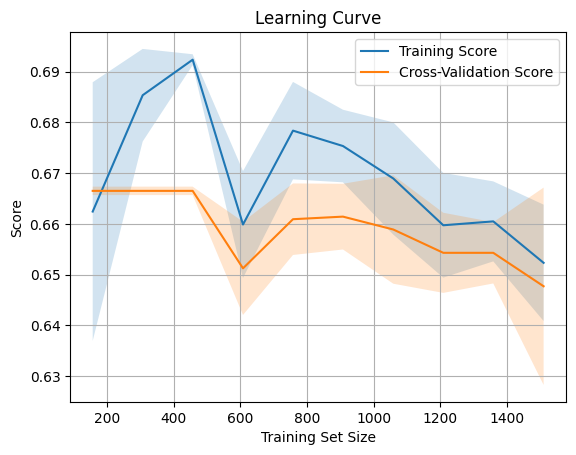

In [80]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pylab as plt
# Define the training set sizes at which the learning curve will be calculated
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 0.96,10))  # You can adjust the number of points as needed


# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

#Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [82]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest classifier
rf_y_pred = rf_model.predict(X_test)

# Predict using Random Forest classifier
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Compute training accuracy for Random Forest classifier
rf_train_accuracy = accuracy_score(y_train, rf_y_pred_train)
print("Random Forest Training Accuracy:", rf_train_accuracy)

# Evaluate Random Forest classifier
rf_test_accuracy = accuracy_score(y_test, rf_y_pred_test)
print("Random Forest Test Accuracy:", rf_test_accuracy)


<ipython-input-82-2291dd043594>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest Training Accuracy: 0.9933909506863243
Random Forest Test Accuracy: 0.991869918699187


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

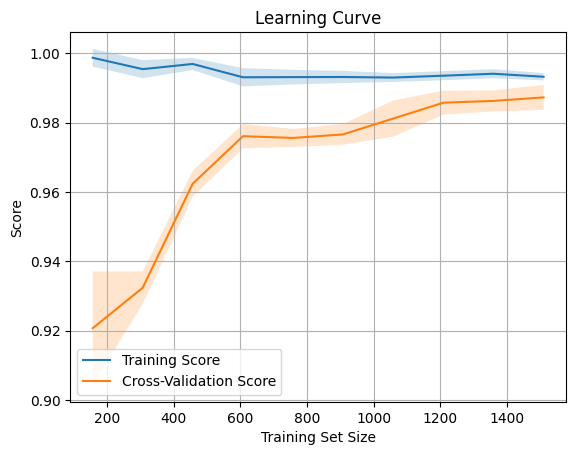

In [83]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pylab as plt
# Define the training set sizes at which the learning curve will be calculated
train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, train_sizes = np.linspace(0.1, 0.96,10))  # You can adjust the number of points as needed


# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

#SVM

In [84]:
# Train a Support Vector Machine classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict using Support Vector Machine classifier
svm_y_pred_train = svm_model.predict(X_train)
svm_y_pred_test = svm_model.predict(X_test)

# Compute training accuracy for Support Vector Machine classifier
svm_train_accuracy = accuracy_score(y_train, svm_y_pred_train)
print("SVM Training Accuracy:", svm_train_accuracy)

# Evaluate Support Vector Machine classifier
svm_test_accuracy = accuracy_score(y_test, svm_y_pred_test)
print("SVM Test Accuracy:", svm_test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Training Accuracy: 0.6664972038637519
SVM Test Accuracy: 0.6361788617886179


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

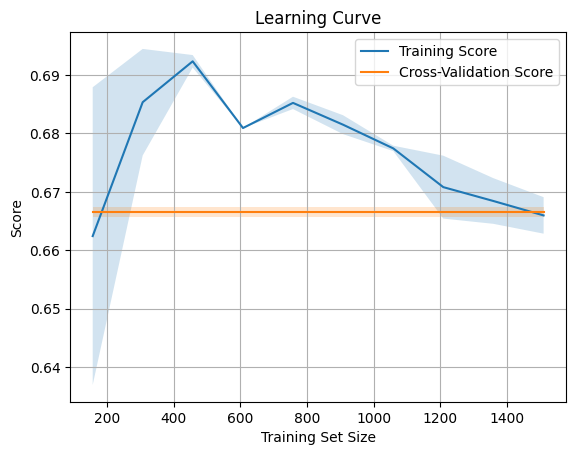

In [85]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pylab as plt
# Define the training set sizes at which the learning curve will be calculated
train_sizes, train_scores, val_scores = learning_curve(svm_model, X_train, y_train, train_sizes = np.linspace(0.1, 0.96,10))  # You can adjust the number of points as needed


# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)

#Download the model with the best accuracy

In [86]:
# saving the model into pkl file
import pickle
pickle_out = open("rf.pkl", mode = "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

#Test model

In [93]:
testinput = [[43, 27]]
#testinput1 = ['HYPERMETROPIA', 'FUCITHALMIC 10mg/g']
#translated_input= []

#transdiagnosis = le.transform([testinput1[0]])[0]
#transprescription = le.transform([testinput1[1]])[0]
#print(transdiagnosis, transprescription)

#translated_input.append(transdiagnosis)
#translated_input.append(transprescription)

test_output=rf_model.predict(testinput)

# Reverse encode a specific number using Label Encoding
original_category = le.inverse_transform([test_output])[0]

print(original_category)

Y


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
